In [ ]:
from keras import layers
from keras import models
# 모델 생성
model=models.Sequential()
# convolution layer, 필터개수 32, 필터크기 3x3,
# 입력데이터 28x28x1 (흑백이미지 1, 컬러이미지 3)
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
# 맥스풀링 필터사이즈 2x2
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
#fully connected layer로 변환 (완전연결층)
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
# 출력층 10개의 숫자로 분류
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=b20a202af3688419a0efb6afc5bf6cbd18cbe1d9e330b26cd64d3362e75064a4
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# 데이터 로딩
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
# 케라스에서 처리할 수 있는 형태로 변환 샘플개수x가로x세로x차원
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype("float32") / 255
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype("float32") / 255
#원 핫 인코딩
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[:2])

11501568/11490434 [==============================] - 0s 0us/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])
#모델 학습
hist=model.fit(train_images, train_labels, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1461 - accuracy: 0.9548
Epoch 2/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0456 - accuracy: 0.9864
Epoch 3/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0323 - accuracy: 0.9900
Epoch 4/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 5/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0214 - accuracy: 0.9938
Epoch 6/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0177 - accuracy: 0.9952
Epoch 7/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0151 - accuracy: 0.9957
Epoch 8/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0139 - accuracy: 0.9964
Epoch 9/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0119 - accuracy: 0.9968
Epoch 10/20
1875/1875 [==============================] - 55s 29m

In [ ]:
# 검증용 데이터로 모델의 성능 평가
test_loss,test_acc=model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.1071 - accuracy: 0.9908


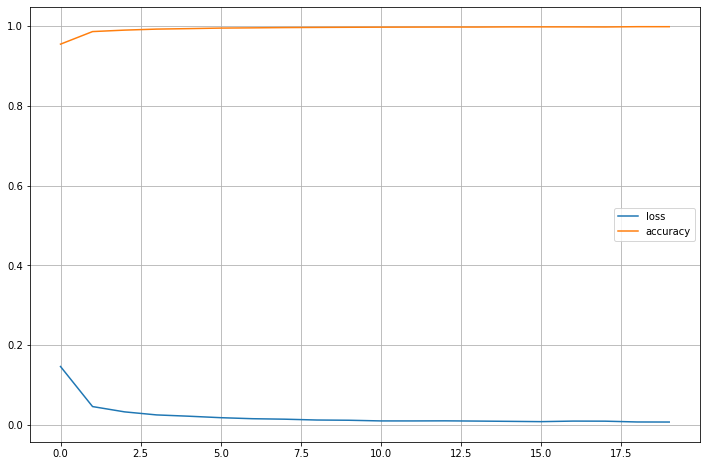

In [ ]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/data/mnist')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data/mnist/assets
